# A Brief look at Monoceros R2

### In this exercise, we examine some Mid-infrared data of the HII region Monoceros R2

## 1. Exploratory Imaging

#### First  import the necessary libraries to read a fits file and visualize the data 

In [ ]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_styledfd
plt.style.use(astropy_mpl_style)
import numpy as np
np.set_printoptions(precision=4, suppress= True)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

#### Read in WISE 12 micron image of Mon R2

In [ ]:
image_file = get_pkg_data_filename('monr2_w3.fits')
image_w3 = fits.getdata(image_file, ext=0)

In [ ]:
fits.info(image_file) #look at file information

#### Try plotting image

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(image_w3, cmap='viridis',origin='lower')
plt.colorbar()

####  There are clearly a few issues here that must be resolved. First, this field of view is much larger than our source, which can be seen in the bottom right quadrant. Thus, it makes sense to cut out a subimage from this frame.

In [ ]:
#make subimage
image_w3_cut = image_w3[1000:1500,3500:]

#plot subimage
plt.figure(figsize=(12,12))
plt.imshow(image_w3_cut, cmap='viridis',origin='lower')
plt.colorbar()

#### The scaling could also be improved, check out the range of the emission included using a histogram

In [ ]:
#reshape subimage into a 1D vector to input into histogram
type(image_w3_cut)
image_w3_cut.size 

image_w3_vec=image_w3_cut.reshape(image_w3_cut.size)

In [ ]:
plt.style.use("seaborn")
plt.hist(image_w3_vec,bins = 100,range=(0,4000),color='b')
plt.xlabel('WISE 12 um emission (DN)')
plt.ylabel('Counts')
plt.show()

#### Clearly most of the emission is ~500-1000 DN/sec

In [ ]:
#Do some quick statistics excluding NaNs
print('max = ',np.nanmax(image_w3_cut))
print('min = ',np.nanmin(image_w3_cut))
print('range =',np.nanmax(image_w3_cut) -np.nanmin(image_w3_cut))
print('mean = ',np.nanmean(image_w3_cut) )
print('median = ',np.nanmedian(image_w3_cut) )
print('mean = ',np.nanmean(image_w3_cut) )
print('std = ', np.nanstd(image_w3_cut))
pcent = np.nanpercentile(image_w3_cut, [5,95])
print("5th percentile = {} & 95th percentile = {}".format(pcent[0],pcent[1]))

In [ ]:
#replot with scaled colorbar
plt.figure(figsize=(12,12))
plt.imshow(image_w3_cut, cmap='viridis',origin='lower', vmax= pcent[0], vmin =pcent[1])
plt.colorbar()

In [ ]:
#try a different colormap
plt.figure(figsize=(12,12))
plt.imshow(image_w3_cut, cmap='inferno',origin='lower',  vmax= pcent[0], vmin =pcent[1])
c1 =plt.colorbar()

#### There is a lot of filamentary structure at lower emission levels (< 750) that isn't visible with a linear color map. A different mapping may help.

In [ ]:
#try a square-root scaling
import matplotlib.colors as colors

plt.figure(figsize=(12,12))
plt.imshow(image_w3_cut, cmap='inferno',origin='lower',norm=colors.PowerNorm(gamma=0.5,  vmax= pcent[1], vmin =pcent[0]))

plt.colorbar()


#### There looks to be some bad pixels in the center of the nebula outlined in yellow above. This could indicate saturation on the detector in the brightest portion of Mon R2.

In [ ]:
#Make a mask for all bad pixels in our subimage
image_w3_mask = np.zeros(image_w3_cut.shape)
bad_pixels =np.where(np.isnan(image_w3_cut))
image_w3_mask[bad_pixels]=1

In [ ]:
#plot bad pixel mask
plt.figure(figsize=(12,12))
plt.imshow(image_w3_mask, cmap='inferno',origin='lower')
plt.colorbar()

#### As suspected, the bad pixels are concentrated in the center of the HII region. Thus, it would be a good idea to find another data product that will provide us with more information about this source. However this WISE 12 um frame is far from useless. We can use the coordinate information to find or plan other observations centered on this source. 

## 2. Astrometry

#### Obtain the wcs information

In [1]:
#Import libraries
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

In [2]:
# read in image and data header with coordinate info
header_data_unit_list = fits.open('monr2_w3.fits')
header_data_unit_list.info()
image = header_data_unit_list[0].data
header = header_data_unit_list[0].header
wcs_mon_r2 = WCS(header)
wcs_mon_r2

Filename: monr2_w3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (4095, 4095)   float32   


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 92.658571  -6.057778  
CRPIX : 2048.0  2048.0  
NAXIS : 4095  4095

#### Replot entire image with the scaling parameters defined in part 1

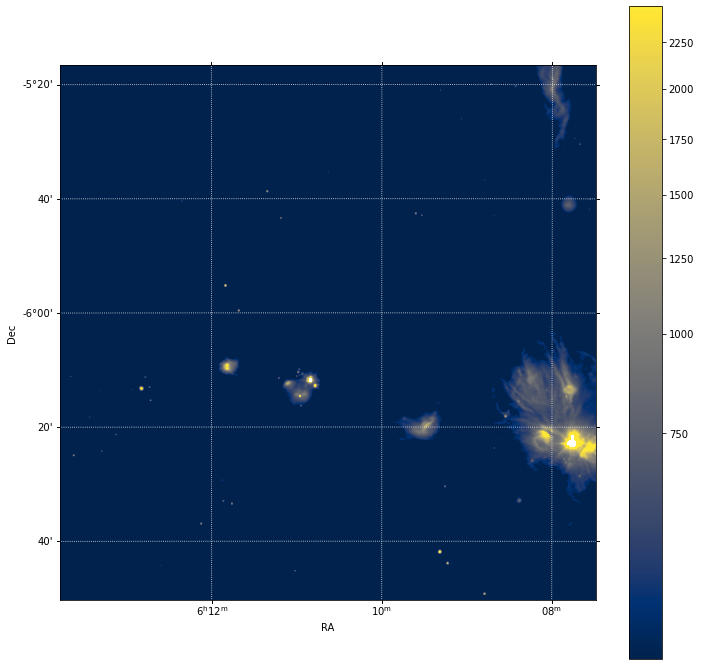

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#rerun these lines 
image_w3_cut = image[1000:1500,3500:]
pcent = np.nanpercentile(image_w3_cut, [5,95])


fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(projection=wcs_mon_r2)
im =plt.imshow(image, cmap='cividis',origin='lower',norm=colors.PowerNorm(gamma=0.5,  vmax= pcent[1], vmin =pcent[0]))


plt.colorbar(ax=ax)


plt.xlabel(r'RA')
plt.ylabel(r'Dec')

#overlay = ax.get_coords_overlay('icrs')
ax.grid(color='white', ls='dotted')

#### The wcs info pertains to the entire frame. It needs to be updated to use in the subimage 